In [23]:
from pipeline_performance_loader import initialization, read_feature
import glob
from collections import defaultdict
import numpy as np
import math
from matplotlib import pyplot as plt

In [6]:
def compute_percentiel(data):
	percentile = []
	for i in [5, 25, 50, 75, 95]:
		percentile.append(np.percentile(data, i))

	return percentile


def bucketize_feature(feature, perf, num_of_bucket=4):
	feature_range = (min(feature), max(feature))
	featuer_list = []
	perf_list = []
	feature_bins = np.logspace(math.log10(feature_range[0]), math.log10(feature_range[1]), num=num_of_bucket+1)
	perf_bucket = defaultdict(list)
	for i in range(len(feature)):
		current_feature = feature[i]
		print(current_feature)
		if current_feature >= feature_bins[-1]:
			current_bin = len(feature_bins) - 1 
		else:
			current_bin = next(x[0] for x in enumerate(feature_bins) 
								if x[1] >= current_feature)

		perf_bucket[feature_bins[current_bin]].append(perf[i])


	return perf_bucket

In [7]:
all_feature_names, moving, video_to_delete, selected_video, glimpse_video_to_delete = initialization()
path = '../feature_analysis/video_features_30s/'
# feature_file = path + 'features_all_type_width_height_filter.csv'
feature_file = path + 'allvideo_features_long_add_width_20_filter.csv'
features = read_feature(feature_file)

driving2_3,0.0,0.0,0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017777777777777778,0,0.03079506172839507,0.17548521797688565,10.38655522428052,109.89372638584705,0.03079506172839507,0.0,0.0,0.0,0.0,0.0,2.252728336819822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0

driving2_8,0.0,0.0,0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0

driving2_27,0.0,0.0,0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,

In [9]:
# load videostorm and glimpse performance
# load selected videos
def VS_parser(path):
    perf = {}
    for file in glob.glob(path + 'videostorm_*.csv'):
        with open(file, 'r') as f:
            f.readline()
            for line in f:
                line_list = line.strip().split(',')
                f1 = float(line_list[2])
                gpu = float(line_list[1])
                perf[line_list[0]] = (gpu, f1)
    return perf

def GL_parser(path, video_to_delete, moving):
    perf = defaultdict(list)
    moving_or_not = {}
    for file in glob.glob(path + 'glimpse_*.csv'):
        dataset = file.split('_')[-1].replace('.csv', '')
        if dataset in video_to_delete:
            continue
        with open(file, 'r') as f:
            f.readline()
            for line in f:
                line_list = line.strip().split(',')
                f1 = float(line_list[3])
                gpu = float(line_list[4])
                if dataset in moving:
                    moving_or_not[line_list[0]] = 1
                else:
                    moving_or_not[line_list[0]] = 0
                perf[line_list[0]] = (gpu, f1, float(line_list[5]))
    return perf, moving_or_not



vs_path = './VS_overfitting/'
vs_perf = VS_parser(vs_path)
gl_path = './glimpse_overfitting/'
gl_perf, _ = GL_parser(gl_path, glimpse_video_to_delete, moving)

In [10]:
# load selected videos for GL and VS
selected_video_path = './video_selection_results/'
selected_videos = []
with open(selected_video_path + 'vs_video_selection.csv', 'r') as f:
    f.readline()
    for line in f:
        line_list = line.strip().split(',')
        if line_list[3] == '':
            break
        selected_videos.append(line_list[3])
        
print(selected_videos)

['crossroad2_63', 'drift_0', 'drift_2', 'drift_6', 'drift_9', 'drift_13', 'drift_19', 'drift_24', 'drift_25', 'drift_26', 'drift_28', 'drift_29', 'drift_30', 'driving1_8', 'driving1_19', 'driving1_32', 'nyc_2', 'jp_4', 'jp_17', 'driving2_11', 'driving2_13', 'driving2_21', 'driving2_26', 'driving2_29', 'driving2_36', 'driving2_38', 'park_2', 'park_12', 'park_17', 'park_30', 'park_38', 'russia_6', 'russia_7', 'russia1_9', 'russia1_17', 'russia1_38', 'segment-10206293520369375008_2796_800_2816_800_with_camera_labels', 'segment-11004685739714500220_2300_000_2320_000_with_camera_labels', 'segment-12681651284932598380_3585_280_3605_280', 'segment-12974838039736660070_4586_990_4606_990', 'segment-13177337129001451839_9160_000_9180_000', 'segment-13258835835415292197_965_000_985_000', 'segment-14098605172844003779_5084_630_5104_630', 'segment-14466332043440571514_6530_560_6550_560', 'segment-14742731916935095621_1325_000_1345_000', 'segment-15367782110311024266_2103_310_2123_310', 'segment-259

In [31]:
perf1 = []
perf2 = []
feature1 = []
feature2 = []
for key in selected_videos:
    if key not in features or key not in vs_perf or key not in gl_perf:
        continue
    feature1.append(features[key][all_feature_names.index('velocity_avg')])
    feature2.append(features[key][all_feature_names.index('percentage')])
    perf1.append(vs_perf[key][0])
    perf2.append(gl_perf[key][0])

1.2440845712447097
2.411618713784495
2.468250527097136
2.613832014973827
2.5896414049427605
2.5503760825364328
2.3401732971076594
2.4044641956900135
2.108877608288165
2.080275619878196
2.2152176743155745
2.297922363056342
2.2094620704036583
1.874726998886678
1.847117052680119
1.2218927843772265
1.1532966044960986
1.2889506112352487
1.3584307440997216
1.561244560303397
1.1852962213514868
1.4238745644475186
1.3033577555229041
1.786587958739695
1.785091690020077
1.9888087772641363
1.6099926084376042
2.143030114763649
1.9744020379256524
1.7917740102433801
1.5154240777877128
1.8680312450841343
1.9129691320639406
2.314097620485541
1.2440845712447097
2.411618713784495
2.468250527097136
2.613832014973827
2.5896414049427605
2.5503760825364328
2.3401732971076594
2.4044641956900135
2.108877608288165
2.080275619878196
2.2152176743155745
2.297922363056342
2.2094620704036583
1.874726998886678
1.847117052680119
1.2218927843772265
1.1532966044960986
1.2889506112352487
1.3584307440997216
1.561244560303

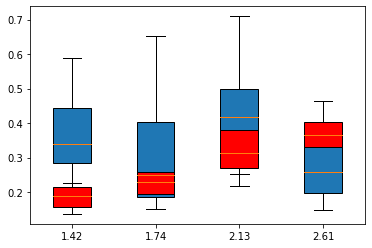

In [32]:
feature = feature1
vs_perf_bucket = bucketize_feature(feature, perf1)
gl_perf_bccket = bucketize_feature(feature, perf2)
fig, ax = plt.subplots()
vs_all_percentile = []
gl_all_percentile = []
xticks =  []
for key in sorted(vs_perf_bucket.keys())[1:]:
    xticks.append(format(key, '02.2f'))
    current_perf = vs_perf_bucket[key]
    percentile = compute_percentiel(current_perf)
    vs_all_percentile.append(percentile)
    current_perf = gl_perf_bccket[key]
    percentile = compute_percentiel(current_perf)
    gl_all_percentile.append(percentile)
ax.boxplot(gl_all_percentile,showfliers=False, patch_artist=True)
bp = ax.boxplot(vs_all_percentile,showfliers=False, patch_artist=True)
for patch in bp['boxes']:
    patch.set(facecolor='r') 
plt.xticks(np.arange(1, len(vs_all_percentile) + 1), xticks)      
plt.show()




0.8366666666666667
0.3888888888888889
0.33111111111111113
0.20333333333333334
0.15222222222222223
0.21555555555555556
0.38
0.3188888888888889
0.2866666666666667
0.15666666666666668
0.12555555555555556
0.23555555555555555
0.19666666666666666
0.59
0.35
0.8277777777777777
0.7544444444444445
0.8144444444444444
0.6933333333333334
0.23222222222222222
0.10777777777777778
0.21555555555555556
0.39444444444444443
0.13555555555555557
0.21444444444444444
0.11666666666666667
0.47888888888888886
0.6188888888888889
0.42777777777777776
0.35888888888888887
0.06555555555555556
0.6011111111111112
0.7611111111111111
0.4866666666666667
0.8366666666666667
0.3888888888888889
0.33111111111111113
0.20333333333333334
0.15222222222222223
0.21555555555555556
0.38
0.3188888888888889
0.2866666666666667
0.15666666666666668
0.12555555555555556
0.23555555555555555
0.19666666666666666
0.59
0.35
0.8277777777777777
0.7544444444444445
0.8144444444444444
0.6933333333333334
0.23222222222222222
0.10777777777777778
0.21555555

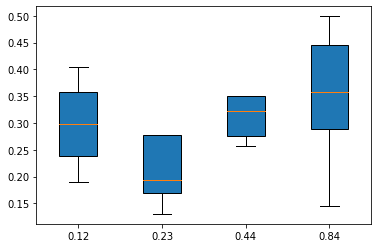

In [38]:
feature = feature2
vs_perf_bucket = bucketize_feature(feature, perf1)
gl_perf_bccket = bucketize_feature(feature, perf2)
fig, ax = plt.subplots()
vs_all_percentile = []
gl_all_percentile = []
xticks =  []
for key in sorted(vs_perf_bucket.keys())[1:]:
    xticks.append(format(key, '02.2f'))
    current_perf = vs_perf_bucket[key]
    percentile = compute_percentiel(current_perf)
    vs_all_percentile.append(percentile)
    current_perf = gl_perf_bccket[key]
    percentile = compute_percentiel(current_perf)
    gl_all_percentile.append(percentile)
ax.boxplot(gl_all_percentile,showfliers=False, patch_artist=True)
# bp = ax.boxplot(vs_all_percentile,showfliers=False, patch_artist=True)
for patch in bp['boxes']:
    patch.set(facecolor='r') 
plt.xticks(np.arange(1, len(vs_all_percentile) + 1), xticks)      
plt.show()



Text(0, 0.5, 'avg. velocity')

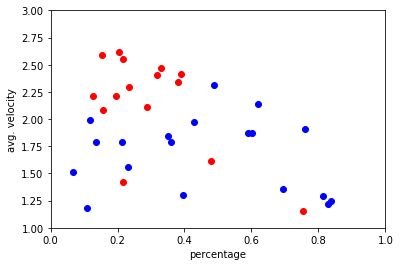

In [37]:
for i in range(len(feature1)):
    if perf1[i] > perf2[i]:
        plt.scatter(feature2[i], feature1[i], c = 'r')
    if perf1[i] < perf2[i]:
        plt.scatter(feature2[i], feature1[i], c = 'b')
plt.ylim(1, 3)
plt.xlim(0, 1)
plt.xlabel('percentage')
plt.ylabel('avg. velocity')